In [101]:
import pandas as pd

members=pd.read_csv('/Users/pravinshankar/Downloads/members_v3.csv')

In [102]:
members

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915
...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,0,NaN,7,20151020
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,0,NaN,7,20151020
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,26,female,4,20151020
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,0,NaN,4,20151020


In [103]:
#contains msno other than train also. 
import numpy as np

Train_msno_and_label_order=np.load('/Users/pravinshankar/Downloads/Train_msno_and_label_order.npy',allow_pickle=True)

In [104]:
Train_msno_and_label_order[0]

array(['+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=', '0'], dtype=object)

In [105]:
Train_msno=pd.DataFrame(Train_msno_and_label_order,columns=['msno', 'Label'])

In [106]:
#convert object to integer data type
Train_msno['Label']=Train_msno.Label.astype(int)

In [107]:
Train_msno.head()

,msno,Label
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1


In [108]:
Train_members=pd.merge(Train_msno, members, on='msno')

In [109]:
Train_members

,msno,Label,city,bd,gender,registered_via,registration_init_time
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0,6,22,female,3,20121224
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1,1,0,NaN,7,20140608
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1,15,26,male,9,20101118
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1,1,0,NaN,7,20140927
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1,18,21,male,7,20160315
...,...,...,...,...,...,...,...
846716,zzxqpgPX1epGyR3SVRKb3XitWdt+JqDURxV5ea1D7Cg=,1,4,19,male,9,20100704
846717,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,1,5,31,male,3,20150430
846718,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,0,9,0,NaN,7,20130515
846719,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,1,4,48,female,9,20140611


### Observation:
1. Only 846721 users' details are available.

In [110]:
#class label count 
Train_members['Label'].value_counts()

1    788129
0     58592
Name: Label, dtype: int64

In [111]:
#keep msno without features as well
Train_members=pd.merge(Train_msno, members, on='msno',how='left')

In [112]:
Train_members

,msno,Label,city,bd,gender,registered_via,registration_init_time
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0,6.0,22.0,female,3.0,20121224.0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1,1.0,0.0,NaN,7.0,20140608.0
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1,15.0,26.0,male,9.0,20101118.0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1,1.0,0.0,NaN,7.0,20140927.0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1,18.0,21.0,male,7.0,20160315.0
...,...,...,...,...,...,...,...
956322,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,1,5.0,31.0,male,3.0,20150430.0
956323,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,0,9.0,0.0,NaN,7.0,20130515.0
956324,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,1,4.0,48.0,female,9.0,20140611.0
956325,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,1,1.0,0.0,NaN,7.0,20120416.0


In [113]:
Train_members['Label'].value_counts()

1    893170
0     63157
Name: Label, dtype: int64

## EDA:

### 1.City:

<BarContainer object of 21 artists>

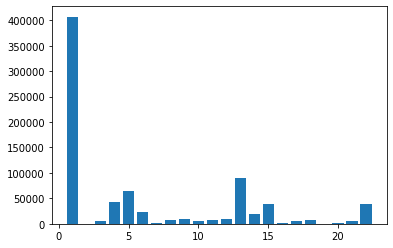

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(Train_members[Train_members['Label']==1]['city'].value_counts().index,
        Train_members[Train_members['Label']==1]['city'].value_counts())

<BarContainer object of 21 artists>

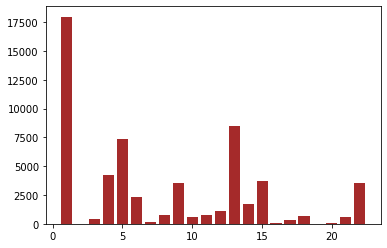

In [27]:
plt.bar(Train_members[Train_members['Label']==0]['city'].value_counts().index,
        Train_members[Train_members['Label']==0]['city'].value_counts(),
       color='brown')

### Observation:
1. Roughly half the users are from city 1.
2. Only 30% of the users who churned are from city 1. So users from city 1 are less likely to  churn.

### Age:

In [28]:
Train_members['bd'].value_counts()

0.0       457178
27.0       22913
26.0       22033
25.0       20715
28.0       20511
           ...  
820.0          1
821.0          1
824.0          1
826.0          1
1009.0         1
Name: bd, Length: 231, dtype: int64

### Observation:
1. There are errors. 

In [29]:
Train_members[Train_members['Label']==1]['bd'].fillna(-1)

1          0.0
2         26.0
3          0.0
4         21.0
5         32.0
          ... 
956321    19.0
956322    31.0
956324    48.0
956325     0.0
956326    -1.0
Name: bd, Length: 893170, dtype: float64

In [35]:
import numpy as np
from prettytable import PrettyTable
#Calculate percentiles for churn and not churn separately

x = PrettyTable()
x.field_names = ["Percentile", "Not churn", "Churn"]

for i in range(0,101,5):
    if i==100:
        for j in [96,97,98,99,99.9]:
            x.add_row([j,np.percentile(Train_members[Train_members['Label']==1]['bd'].fillna(-1),j), 
               np.percentile(Train_members[Train_members['Label']==0]['bd'].fillna(-1),j)])
            
    x.add_row([i,np.percentile(Train_members[Train_members['Label']==1]['bd'].fillna(-1),i), 
               np.percentile(Train_members[Train_members['Label']==0]['bd'].fillna(-1),i)])
print(x)

+------------+-----------+------------------+
| Percentile | Not churn |      Churn       |
+------------+-----------+------------------+
|     0      |  -3152.0  |     -5978.0      |
|     5      |    -1.0   |       -1.0       |
|     10     |    -1.0   |       0.0        |
|     15     |    0.0    |       0.0        |
|     20     |    0.0    |       0.0        |
|     25     |    0.0    |       0.0        |
|     30     |    0.0    |       0.0        |
|     35     |    0.0    |       0.0        |
|     40     |    0.0    |       17.0       |
|     45     |    0.0    |       19.0       |
|     50     |    0.0    |       21.0       |
|     55     |    0.0    |       22.0       |
|     60     |    0.0    |       24.0       |
|     65     |    21.0   |       25.0       |
|     70     |    24.0   |       27.0       |
|     75     |    26.0   |       29.0       |
|     80     |    28.0   |       31.0       |
|     85     |    31.0   |       33.0       |
|     90     |    34.0   |       3

### Observation:
1. 99.9% users are of age less than 82.

In [36]:
# Only Age between 10 and 85 is considered, remaining changed to -1
def fun(x):
    if x<10 or x>85:
        return -1
    else:
        return x

In [37]:
# Only Age>10 and <85 is considered, remaining changed to -1
Train_members['bd']=Train_members['bd'].apply(fun)

In [38]:
Train_members

,msno,Label,city,bd,gender,registered_via,registration_init_time
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0,6.0,22.0,female,3.0,20121224.0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1,1.0,-1.0,NaN,7.0,20140608.0
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1,15.0,26.0,male,9.0,20101118.0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1,1.0,-1.0,NaN,7.0,20140927.0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1,18.0,21.0,male,7.0,20160315.0
...,...,...,...,...,...,...,...
956322,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,1,5.0,31.0,male,3.0,20150430.0
956323,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,0,9.0,-1.0,NaN,7.0,20130515.0
956324,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,1,4.0,48.0,female,9.0,20140611.0
956325,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,1,1.0,-1.0,NaN,7.0,20120416.0


In [39]:
import numpy as np
from prettytable import PrettyTable
#Calculate percentiles for churn and not churn separately

x = PrettyTable()
x.field_names = ["Percentile", "Not churn", "Churn"]

for i in range(0,101,5):
    if i==100:
        for j in [96,97,98,99,99.9]:
            x.add_row([j,np.percentile(Train_members[Train_members['Label']==1]['bd'].fillna(-1),j), 
               np.percentile(Train_members[Train_members['Label']==0]['bd'].fillna(-1),j)])
            
    x.add_row([i,np.percentile(Train_members[Train_members['Label']==1]['bd'].fillna(-1),i), 
               np.percentile(Train_members[Train_members['Label']==0]['bd'].fillna(-1),i)])
print(x)

+------------+-----------+-------+
| Percentile | Not churn | Churn |
+------------+-----------+-------+
|     0      |    -1.0   |  -1.0 |
|     5      |    -1.0   |  -1.0 |
|     10     |    -1.0   |  -1.0 |
|     15     |    -1.0   |  -1.0 |
|     20     |    -1.0   |  -1.0 |
|     25     |    -1.0   |  -1.0 |
|     30     |    -1.0   |  -1.0 |
|     35     |    -1.0   |  -1.0 |
|     40     |    -1.0   |  17.0 |
|     45     |    -1.0   |  19.0 |
|     50     |    -1.0   |  21.0 |
|     55     |    -1.0   |  22.0 |
|     60     |    -1.0   |  24.0 |
|     65     |    21.0   |  25.0 |
|     70     |    24.0   |  27.0 |
|     75     |    26.0   |  29.0 |
|     80     |    28.0   |  31.0 |
|     85     |    31.0   |  33.0 |
|     90     |    34.0   |  36.0 |
|     95     |    40.0   |  41.0 |
|     96     |    42.0   |  43.0 |
|     97     |    44.0   |  45.0 |
|     98     |    48.0   |  48.0 |
|     99     |    52.0   |  52.0 |
|    99.9    |    65.0   |  66.0 |
|    100     |    85

### Gender:

<BarContainer object of 2 artists>

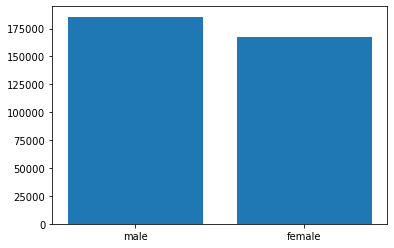

In [42]:
plt.bar(Train_members[Train_members['Label']==1]['gender'].value_counts().index,
        Train_members[Train_members['Label']==1]['gender'].value_counts())


<BarContainer object of 2 artists>

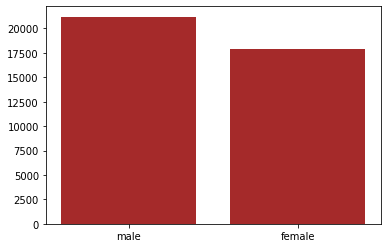

In [43]:
plt.bar(Train_members[Train_members['Label']==0]['gender'].value_counts().index,
        Train_members[Train_members['Label']==0]['gender'].value_counts(),
       color='brown')

### Observation:
1. gender feature doesn't look promising but may be helpful when it interacts with other features

### Registered via:

<BarContainer object of 5 artists>

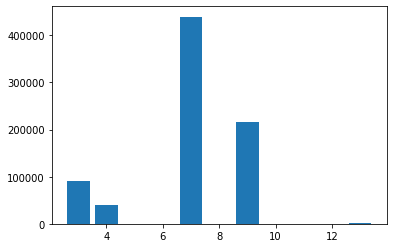

In [41]:
plt.bar(Train_members[Train_members['Label']==1]['registered_via'].value_counts().index,
        Train_members[Train_members['Label']==1]['registered_via'].value_counts())

<BarContainer object of 5 artists>

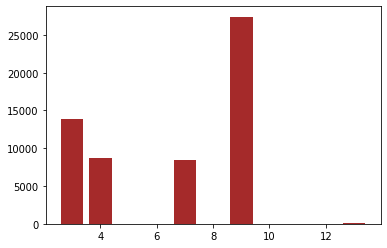

In [42]:
plt.bar(Train_members[Train_members['Label']==0]['registered_via'].value_counts().index,
        Train_members[Train_members['Label']==0]['registered_via'].value_counts(), 
        color='brown')

### Observation:
Registered via_7 users are less likely to churn.

### Registration init time:

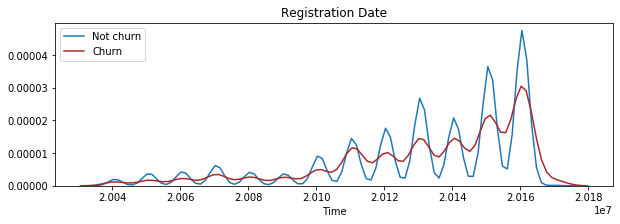

In [115]:
import seaborn as sns

plt.figure(figsize=(10,3))
sns.distplot(Train_members[Train_members['Label']==1]['registration_init_time'].dropna(), hist=False, label="Not churn")
sns.distplot(Train_members[Train_members['Label']==0]['registration_init_time'].dropna(), hist=False, label="Churn",
             color='brown')
plt.title('Registration Date')
plt.xlabel('Time')
plt.legend()
plt.show()

### Observation:
1. Users are growing every year and, the churn and not churn is also growing.
2. This maybe useful with other data.

In [120]:
import numpy as np
from prettytable import PrettyTable
#Calculate percentiles for churn and not churn separately

x = PrettyTable()
x.field_names = ["Percentile", "Not churn", "Churn"]

for i in range(0,101,5):
    if i==100:
        for j in [96,97,98,99,99.9]:
            x.add_row([j,np.percentile(Train_members[Train_members['Label']==1]['registration_init_time'].fillna(-1),j), 
               np.percentile(Train_members[Train_members['Label']==0]['registration_init_time'].fillna(-1),j)])
            
    x.add_row([i,np.percentile(Train_members[Train_members['Label']==1]['registration_init_time'].fillna(-1),i), 
               np.percentile(Train_members[Train_members['Label']==0]['registration_init_time'].fillna(-1),i)])
print(x)

+------------+------------+------------+
| Percentile | Not churn  |   Churn    |
+------------+------------+------------+
|     0      |    -1.0    |    -1.0    |
|     5      |    -1.0    |    -1.0    |
|     10     |    -1.0    | 20060504.0 |
|     15     | 20060425.0 | 20080820.0 |
|     20     | 20080612.0 | 20100904.2 |
|     25     | 20101003.0 | 20111022.0 |
|     30     | 20110629.0 | 20111226.0 |
|     35     | 20120222.0 | 20120827.0 |
|     40     | 20121119.0 | 20130302.0 |
|     45     | 20130521.0 | 20130906.0 |
|     50     | 20131012.0 | 20140216.0 |
|     55     | 20140224.0 | 20140911.0 |
|     60     | 20140920.0 | 20150112.0 |
|     65     | 20150502.0 | 20150621.0 |
|     70     | 20150830.0 | 20151013.0 |
|     75     | 20151107.0 | 20151221.0 |
|     80     | 20160116.0 | 20160205.0 |
|     85     | 20160319.0 | 20160610.0 |
|     90     | 20160630.0 | 20160924.0 |
|     95     | 20160923.0 | 20161202.0 |
|     96     | 20161017.0 | 20161212.0 |
|     97     | 2

### Observation:
1. More recent users are more likely to churn.
2. Some Registration dates are in future which is wrong.
3. Is there a data leakage? 
4. I learned from the dicussion section that Previous version of members.csv file leaked information and it was removed.

In [57]:
Train_members[['msno','registration_init_time']].sort_values(by=['registration_init_time'],ascending=[False])

,msno,registration_init_time
733549,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,20170326.0
226566,D9BbvAVT6NH8vrQFVqYgiSeVKnLbDztVGlZc8hvYmd8=,20170321.0
174471,9enC5ob2jbo0ydHtozG1HX6Rg8AgYJaLKJq4vkjhXNQ=,20170312.0
72974,2rS+lHK5d9cvpqGgNDy7T3OxaFvtQFXkgDd1yP+ld4s=,20170301.0
14044,+w+HUNYc6L/G81PVPas25NaU3JfzYWjowyTnSG2MiCk=,20170131.0
...,...,...
956280,zzluOt3F7bCPVG8ZRgGbGNYVSICKW1xIjx4PpepeK2s=,NaN
956307,zzuiTQN9MP4dT+mVTYuaFGeQwum5iIkUW56LyzPi4gA=,NaN
956311,zzvZ4AqXwz9Yh2nyExvdWL3YxRVvFLLotZaLXJL6Hik=,NaN
956320,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,NaN


In [59]:
transaction[transaction['msno']=='l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=']

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1011394,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,30,30,149,149,1,20150526,20150625,0
2107879,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,30,30,149,149,1,20160626,20160725,0
2177378,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,30,30,149,149,1,20150926,20151025,0
3025336,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,30,30,149,149,1,20160226,20160325,0
3433755,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,30,30,149,149,1,20160326,20160425,0
5438238,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,30,30,149,149,1,20160726,20160825,0
7127714,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,30,30,149,149,1,20160526,20160625,0
7500059,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,30,30,149,149,1,20151026,20151125,0
7970349,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,30,30,149,149,1,20170226,20170325,0
8542614,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,30,30,149,149,1,20150726,20150825,0


### Observation:
1. User has transacted before mar 2017.

In [132]:
Train_msno[Train_members['registration_init_time']>20170131]

,msno,Label
72974,2rS+lHK5d9cvpqGgNDy7T3OxaFvtQFXkgDd1yP+ld4s=,1
174471,9enC5ob2jbo0ydHtozG1HX6Rg8AgYJaLKJq4vkjhXNQ=,1
226566,D9BbvAVT6NH8vrQFVqYgiSeVKnLbDztVGlZc8hvYmd8=,1
733549,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,1


### Observation:
1. Users with registration date in future don't churn. 
2. but these date should be replaced with -1 because there are no users with registration date in future for (Kaggle set). Repeat it for CV data as well. 

In [138]:
Train_msno[Train_members['registration_init_time']>20161231]

,msno,Label
405,+/rpfe9Rc1cCt2TPBnhdfL5vPy+9iYaEHBD6mA0lo5Q=,0
488,+08TIrjNcQp99DWN93kjNVECP0hYgLFCffvdESuTXaE=,0
2001,+6bQi/rVHpQ2iuMihayLPmadCCpGP9X8aJNgPGB3Hjo=,0
2962,+AZVHbqcJBFBAJqbee8VE9PFH5DI+lFmOb/5gBK1vsQ=,0
3893,+EUGJNNqaOAnsJg5DzFJJsvZIZeHa3m7YhklE4b6Z0o=,0
...,...,...
949527,zWjCdZ+suSw0RMCuAhqfoOFNxYWjwmDZ4hbGaGBjnhs=,1
950851,zcIgPgdNwGe+VuEcHU19rP4qBjqPIyF8sHTFDmZHF3Y=,0
951634,zfWVhGe7EIfCAufXfcMTXlg3bA0DvUqIShzp3vBLkCs=,0
953958,zppHX6dL7oUVtq2eK7kPxPjYIsxf1li10WGiQnm0s+M=,0


### Observation:
1. All these users are not part of Train_msno_actual

## Featurize categorical variables:

In [65]:
#Load CV data
import numpy as np

CV_msno_and_label_order=np.load('/home/pravinshankar1/Case_study_2/CV/CV_msno_and_label_order.npy',allow_pickle=True)
CV_msno=pd.DataFrame(CV_msno_and_label_order,columns=['msno', 'Label'])
CV_msno['Label']=CV_msno.Label.astype(int)
CV_msno

,msno,Label
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,1
...,...,...
993522,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,1
993523,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,1
993524,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,1
993525,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,0


In [68]:
CV_members=pd.merge(CV_msno, members, on='msno',how='left')
CV_members

,msno,Label,city,bd,gender,registered_via,registration_init_time
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1,1.0,0.0,NaN,7.0,20140608.0
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1,15.0,26.0,male,9.0,20101118.0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1,1.0,0.0,NaN,7.0,20140927.0
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1,18.0,21.0,male,7.0,20160315.0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,1,22.0,32.0,male,9.0,20120122.0
...,...,...,...,...,...,...,...
993522,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,1,4.0,24.0,male,7.0,20120306.0
993523,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,1,NaN,NaN,NaN,NaN,NaN
993524,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,1,4.0,48.0,female,9.0,20140611.0
993525,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,0,1.0,0.0,NaN,7.0,20120416.0


In [116]:
# Only Age>10 and <85 is considered, remaining changed to -1
CV_members['bd']=CV_members['bd'].apply(fun)

In [119]:
CV_members

,msno,Label,city,bd,gender,registered_via,registration_init_time
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1,1.0,-1.0,NaN,7.0,20140608.0
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1,15.0,26.0,male,9.0,20101118.0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1,1.0,-1.0,NaN,7.0,20140927.0
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1,18.0,21.0,male,7.0,20160315.0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,1,22.0,32.0,male,9.0,20120122.0
...,...,...,...,...,...,...,...
993522,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,1,4.0,24.0,male,7.0,20120306.0
993523,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,1,NaN,NaN,NaN,NaN,NaN
993524,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,1,4.0,48.0,female,9.0,20140611.0
993525,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,0,1.0,-1.0,NaN,7.0,20120416.0


In [70]:
#Load Test data
import numpy as np

Test_msno_and_label_order=np.load('/home/pravinshankar1/Case_study_2/Test/Test_msno_and_label_order.npy',allow_pickle=True)
Test_msno=pd.DataFrame(Test_msno_and_label_order,columns=['msno', 'Label'])
Test_msno['Label']=Test_msno.Label.astype(int)
Test_msno

,msno,Label
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,1
...,...,...
1004390,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,1
1004391,zzxqpgPX1epGyR3SVRKb3XitWdt+JqDURxV5ea1D7Cg=,0
1004392,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,1
1004393,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,1


In [71]:
Test_members=pd.merge(Test_msno, members, on='msno',how='left')
Test_members

,msno,Label,city,bd,gender,registered_via,registration_init_time
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1,1.0,0.0,NaN,7.0,20140608.0
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1,15.0,26.0,male,9.0,20101118.0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1,1.0,0.0,NaN,7.0,20140927.0
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1,18.0,21.0,male,7.0,20160315.0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,1,22.0,32.0,male,9.0,20120122.0
...,...,...,...,...,...,...,...
1004390,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,1,NaN,NaN,NaN,NaN,NaN
1004391,zzxqpgPX1epGyR3SVRKb3XitWdt+JqDURxV5ea1D7Cg=,0,4.0,19.0,male,9.0,20100704.0
1004392,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,1,5.0,31.0,male,3.0,20150430.0
1004393,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,1,4.0,48.0,female,9.0,20140611.0


In [117]:
# Only Age>10 and <85 is considered, remaining changed to -1
Test_members['bd']=Test_members['bd'].apply(fun)

In [118]:
Test_members

,msno,Label,city,bd,gender,registered_via,registration_init_time
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1,1.0,-1.0,NaN,7.0,20140608.0
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1,15.0,26.0,male,9.0,20101118.0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1,1.0,-1.0,NaN,7.0,20140927.0
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1,18.0,21.0,male,7.0,20160315.0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,1,22.0,32.0,male,9.0,20120122.0
...,...,...,...,...,...,...,...
1004390,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,1,NaN,NaN,NaN,NaN,NaN
1004391,zzxqpgPX1epGyR3SVRKb3XitWdt+JqDURxV5ea1D7Cg=,0,4.0,19.0,male,9.0,20100704.0
1004392,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,1,5.0,31.0,male,3.0,20150430.0
1004393,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,1,4.0,48.0,female,9.0,20140611.0


### City:

In [120]:
Train_members['city']

0          6.0
1          1.0
2         15.0
3          1.0
4         18.0
          ... 
956322     5.0
956323     9.0
956324     4.0
956325     1.0
956326     NaN
Name: city, Length: 956327, dtype: float64

In [121]:
#https://stackoverflow.com/a/53219364
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(set(list(map(str, Train_members['city'].values)))), lowercase=False, binary=True)
vectorizer.fit(list(map(str, Train_members['city'].values))) #convert integer values to string
print(vectorizer.get_feature_names())

Train_city = vectorizer.transform(list(map(str, Train_members['city'].values)))
CV_city = vectorizer.transform(list(map(str, CV_members['city'].values)))
Test_city=vectorizer.transform(list(map(str, Test_members['city'].values)))

print('Train_city',Train_city.shape)
print('CV_city',CV_city.shape)
print('Test_city',Test_city.shape)

['16.0', '22.0', '13.0', '6.0', 'nan', '15.0', '4.0', '21.0', '7.0', '10.0', '5.0', '1.0', '11.0', '20.0', '8.0', '9.0', '18.0', '3.0', '19.0', '12.0', '14.0', '17.0']
Train_city (956327, 22)
CV_city (993527, 22)
Test_city (1004395, 22)


### Gender:

In [122]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(set(list(map(str, Train_members['gender'].values)))), lowercase=False, binary=True)
vectorizer.fit(list(map(str, Train_members['gender'].values))) #convert integer values to string
print(vectorizer.get_feature_names())

Train_gender = vectorizer.transform(list(map(str, Train_members['gender'].values)))
CV_gender = vectorizer.transform(list(map(str, CV_members['gender'].values)))
Test_gender=vectorizer.transform(list(map(str, Test_members['gender'].values)))

print('Train_gender',Train_gender.shape)
print('CV_gender',Train_gender.shape)
print('Test_gender',Train_gender.shape)

['female', 'nan', 'male']
Train_gender (956327, 3)
CV_gender (956327, 3)
Test_gender (956327, 3)


### Registered via:

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(set(list(map(str, Train_members['registered_via'].values)))), lowercase=False, binary=True)
vectorizer.fit(list(map(str, Train_members['registered_via'].values))) #convert integer values to string
print(vectorizer.get_feature_names())

Train_registered_via = vectorizer.transform(list(map(str, Train_members['registered_via'].values)))
CV_registered_via = vectorizer.transform(list(map(str, CV_members['registered_via'].values)))
Test_registered_via=vectorizer.transform(list(map(str, Test_members['registered_via'].values)))

print('Train_registered_via',Train_registered_via.shape)
print('CV_registered_via',CV_registered_via.shape)
print('Test_registered_via',Test_registered_via.shape)

['3.0', '13.0', '4.0', '7.0', '9.0', 'nan']
Train_registered_via (956327, 6)
CV_registered_via (993527, 6)
Test_registered_via (1004395, 6)


In [124]:
Train_m=Train_members[['bd','registration_init_time']].to_numpy()
CV_m=CV_members[['bd','registration_init_time']].to_numpy()
Test_m=Test_members[['bd','registration_init_time']].to_numpy()

In [125]:
Train_m=np.hstack((Train_m,Train_city.todense(),Train_gender.todense(),Train_registered_via.todense()))
CV_m=np.hstack((CV_m,CV_city.todense(),CV_gender.todense(),CV_registered_via.todense()))
Test_m=np.hstack((Test_m,Test_city.todense(),Test_gender.todense(),Test_registered_via.todense()))

In [126]:
Train_m.shape

(956327, 33)

In [127]:
CV_m.shape

(993527, 33)

In [128]:
Test_m.shape

(1004395, 33)

In [129]:
np.save('Train_members',Train_m)
np.save('CV_members',CV_m)
np.save('Test_members',Test_m)

In [130]:
Test_m[0]

matrix([[-1.0000000e+00,  2.0140608e+07,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00]])